<h2>CS986 Spotify Regression Problem 2022</h2><br/>
<p>The goal is to build a model in order to predict the popularity of a song.The dataset used is taken from kaggle : <a>https://www.kaggle.com/cnic92/spotify-past-decades-songs-50s10s </a> which gives us the data of songs available on spofity with their relevant features for model building. We are going to build a regression model as we have to predict a value and use RMSE score determine how good our model is. 
We are provided with training and test data for the same dataset, we will use training data to create predictive models and give predictions on python and use the test data to check the prediction in Kaggle which is associated with an inclass competition.
To start with we are going to import few python packages to use few libraries like Numpy, Pandas,sklearn, matplotlib, Seaborn which will be used for cleaning and visualising the data.</P>

<h3>1. Development Environment Setup and Data Collection</h3>

<p>Import the necessary libraries (numpy, pandas, scikit-learn packages metrics and clustering)</P>

In [1]:
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime
separator_line= "====================================="

<hr>
<p>Reading the data from Train set and also from test set to use for Kaggle predictions<p/>
<p>Import the Spotify dataset available at <a> https://www.kaggle.com/c/cs9856-spotify-regression-problem-2022/data?select=CS98XRegressionTrain.csv <a/> </P>

In [2]:
train_df = pd.read_csv("CS98XRegressionTrain.csv")
test_df = pd.read_csv("CS98XRegressionTest.csv")

<h3>2. Exploratory Data Analysis and Data Preparation</h3> <br/>
<p>let's have a quick look on the data grapically of each feature and check if we find any generic patterns</P>
<br/> 

In [3]:
display(train_df.head(),separator_line,train_df.describe())


Id                                        title            artist  \
0   1                                 My Happiness    Connie Francis   
1   2                             Unchained Melody   The Teddy Bears   
2   3                        How Deep Is Your Love          Bee Gees   
3   4                                Woman in Love  Barbra Streisand   
4   5  Goodbye Yellow Brick Road - Remastered 2014        Elton John   

         top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  \
0  adult standards  1996  107    31    45  -8    13   28  150     75     3   
1              NaN  2011  114    44    53  -8    13   47  139     49     3   
2  adult standards  1979  105    36    63  -9    13   67  245     11     3   
3  adult standards  1980  170    28    47 -16    13   33  232     25     3   
4        glam rock  1973  121    47    56  -8    15   40  193     45     3   

   pop  
0   44  
1   37  
2   77  
3   67  
4   63

'====================================='

Id         year         bpm        nrgy        dnce  \
count  453.000000   453.000000  453.000000  453.000000  453.000000   
mean   227.000000  1991.443709  118.399558   60.070640   59.565121   
std    130.914094    16.776103   25.238713   22.205284   15.484458   
min      1.000000  1948.000000   62.000000    7.000000   18.000000   
25%    114.000000  1976.000000  100.000000   43.000000   49.000000   
50%    227.000000  1994.000000  119.000000   63.000000   61.000000   
75%    340.000000  2007.000000  133.000000   78.000000   70.000000   
max    453.000000  2019.000000  199.000000  100.000000   96.000000   

               dB        live         val         dur       acous        spch  \
count  453.000000  453.000000  453.000000  453.000000  453.000000  453.000000   
mean    -8.836645   17.757174   59.465784  226.278146   32.982340    5.660044   
std      3.577187   13.830300   24.539868   63.770380   29.530015    5.550581   
min    -24.000000    2.000000    6.000000   98.000000    0.000000    2.000000   
25%    -11.000000    9.000000   42.000000  181.000000    7.000000    3.000000   
50%     -8.000000   13.000000   61.000000  223.000000   24.000000    4.000000   
75%     -6.000000   23.000000   80.000000  262.000000   58.000000    6.000000   
max     -1.000000   93.000000   99.000000  511.000000  100.000000   47.000000   

              pop  
count  453.000000  
mean    60.743929  
std     13.470083  
min     26.000000  
25%     53.000000  
50%     63.000000  
75%     71.000000  
max     84.000000

<hr/>
<P>checking the number of rows and columns</p>

In [4]:
train_df.shape

(453, 15)

<hr/>
<p>Total number of rows are 453 so also check how many rows have null value<P/>
<p>Check columns and data type in columns<P/>
<p>See column names and see  if any null values in rows<P/>

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [6]:
display(separator_line+' HAS NULL VALUE',train_df.isnull().values.any(),separator_line+' IS NULL ALL',train_df.isnull().all() ,separator_line+' IS NULL ANY', train_df.isnull().any(),separator_line+' NULL SUM',train_df.isnull().sum(),separator_line+' SHAPE',train_df.shape)

'===================================== HAS NULL VALUE'

True

'===================================== IS NULL ALL'

Id           False
title        False
artist       False
top genre    False
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
dtype: bool

'===================================== IS NULL ANY'

Id           False
title        False
artist       False
top genre     True
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
dtype: bool

'===================================== NULL SUM'

Id            0
title         0
artist        0
top genre    15
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

'===================================== SHAPE'

(453, 15)

<hr/>
<p>Encoding function - to convert 'top genre' catorigal value to numberic, by grouping and replacing with 'nrgy' feature variabe's mean)<p/>

In [7]:
def encoding(dataset):
    encodings = dataset.groupby('top genre')['nrgy'].mean().reset_index()
    encodings.rename(columns={"nrgy": "genre"},inplace=True)
    dataset = dataset.merge(encodings, how='left', on='top genre')
    dataset.drop('top genre', axis=1, inplace=True)
    return dataset


<hr/>
<p>Encoding Training dataset<p/>

In [8]:
train_df=encoding(train_df)

In [9]:
train_df=train_df.drop(columns=['Id','title','artist'])

<hr>
<p>Function: Change Year to Age <p/>

In [10]:
def change_year_to_age(dataset):
    date = datetime.date.today()
    year = date.strftime("%Y")
    dataset['year'] = int(year)-dataset['year']
    dataset.rename(columns={'year': 'age'}, inplace=True)
    return dataset


In [11]:
train_df=change_year_to_age(train_df)

<hr/>
<p>Function: Replace_null_with_mean - Either replace null,NAN with mean OR remove them  <p/>

In [12]:
def replace_null_with_mean(dataset,bool):
    
    replace_null_with_mean = bool
    if (replace_null_with_mean):
   
        for x in dataset:

            dataset[x] = dataset[x].fillna(dataset[x].mean())    
    else:
        dataset = dataset.dropna()
    return dataset





In [13]:
train_df=replace_null_with_mean(train_df,True)

In [14]:
display(separator_line+' SHAPE',train_df.shape,separator_line+' DATSET TABLE',train_df)

'===================================== SHAPE'

(453, 12)

'===================================== DATSET TABLE'

age  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop      genre
0     26  107    31    45  -8    13   28  150     75     3   44  41.838235
1     11  114    44    53  -8    13   47  139     49     3   37  60.504566
2     43  105    36    63  -9    13   67  245     11     3   77  41.838235
3     42  170    28    47 -16    13   33  232     25     3   67  41.838235
4     49  121    47    56  -8    15   40  193     45     3   63  52.062500
..   ...  ...   ...   ...  ..   ...  ...  ...    ...   ...  ...        ...
448   63   80    22    18 -17    10   16  214     92     4   45  41.838235
449   12  148    81    53 -13    23   96  147     50     3   50  50.062500
450   20  168    55    73  -8    20   61  289     23    14   77  67.540984
451   22  165    87    64  -5     6   88  191      5     8   62  67.800000
452   20  105    73    68  -8    14   94  281     11     2   59  67.242424

[453 rows x 12 columns]

In [15]:
train_df.dropna()

age  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop      genre
0     26  107    31    45  -8    13   28  150     75     3   44  41.838235
1     11  114    44    53  -8    13   47  139     49     3   37  60.504566
2     43  105    36    63  -9    13   67  245     11     3   77  41.838235
3     42  170    28    47 -16    13   33  232     25     3   67  41.838235
4     49  121    47    56  -8    15   40  193     45     3   63  52.062500
..   ...  ...   ...   ...  ..   ...  ...  ...    ...   ...  ...        ...
448   63   80    22    18 -17    10   16  214     92     4   45  41.838235
449   12  148    81    53 -13    23   96  147     50     3   50  50.062500
450   20  168    55    73  -8    20   61  289     23    14   77  67.540984
451   22  165    87    64  -5     6   88  191      5     8   62  67.800000
452   20  105    73    68  -8    14   94  281     11     2   59  67.242424

[453 rows x 12 columns]

<hr/>
<p>Identify and remove outliers</p>

<AxesSubplot:>

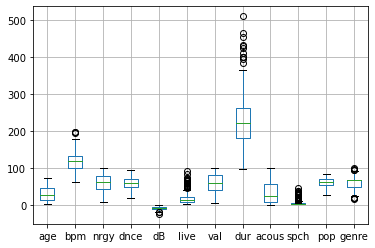

In [16]:
train_df.boxplot()

<hr>
<p>Finding: the 'bpm','dnce','dB','live','dur','spch','pop','genre' variables have outliers <p/>
<p>Resolution: removing all the outliers with Interquartile Range Method <p/>

In [17]:
for x in ['bpm','dnce','dB','live','dur','spch','pop','genre']:
    q75,q25 = np.percentile(train_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_df.loc[train_df[x] < min,x] = np.nan
    train_df.loc[train_df[x] > max,x] = np.nan

<hr>
<p>Analysing outliers<p/>

In [18]:
train_df.isnull().sum()

age       0
bpm       3
nrgy      0
dnce      0
dB        3
live     25
val       0
dur      12
acous     0
spch     40
pop       0
genre     9
dtype: int64

<hr>
<p>Removed and confirm; major outliers have been removed<p/>

<AxesSubplot:>

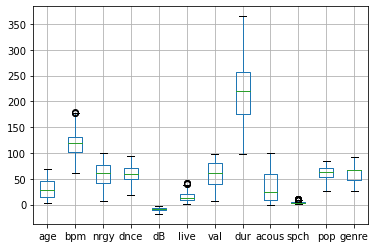

In [19]:
train_df.dropna(inplace=True)
train_df.boxplot()

<hr>
<p>Copying cleaned version of train dataset<p/>

In [20]:
train_cleaned_df = train_df.copy()

In [21]:
train_cleaned_df.isnull().any()

age      False
bpm      False
nrgy     False
dnce     False
dB       False
live     False
val      False
dur      False
acous    False
spch     False
pop      False
genre    False
dtype: bool

<hr>
<p>Analysis of feature variables dependency with targer variable with Correlation (Corellation Matrix)<p/> 

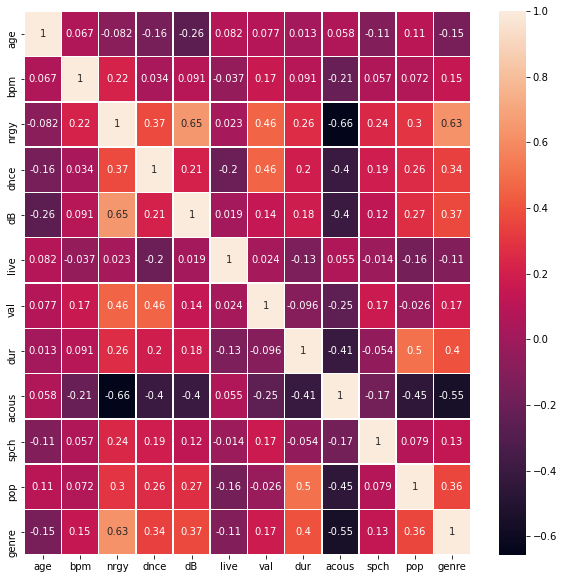

In [22]:
corrMatrix = train_cleaned_df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 

sns.heatmap(corrMatrix, annot=True,linewidths=.5, ax=ax)
plt.show()

In [23]:
corrMatrix["pop"].sort_values(ascending=False)

pop      1.000000
dur      0.502665
genre    0.364432
nrgy     0.295514
dB       0.269408
dnce     0.256201
age      0.105099
spch     0.079025
bpm      0.072078
val     -0.025514
live    -0.160387
acous   -0.450823
Name: pop, dtype: float64

<hr>
<p>The findings from this is it can be seen that there is no corellation of  'age','val' and 'live', and found that there was a negative correlation between 'acous' with the target variable 'pop' <p/>

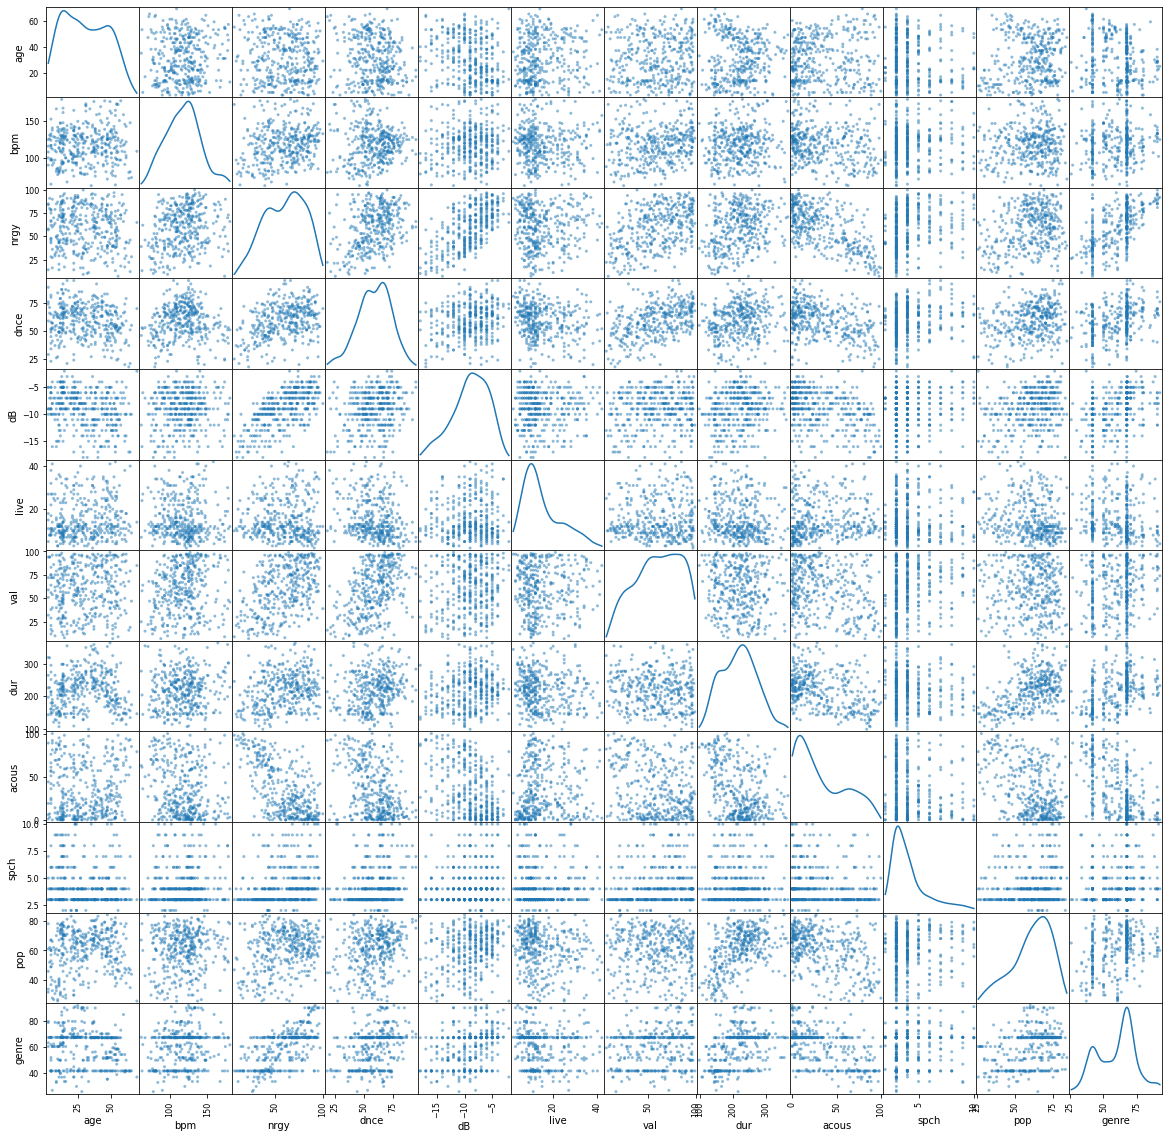

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_cleaned_df, alpha=0.5, figsize=(20, 20), diagonal="kde");

<hr>
<p>Above it can be seen that the target variable 'pop' has no any distinguished pattern with 'bpm','val','age','live'<p/>

<hr>
<p>To check affect of features on rows -predictor features and get distribution of features <p/>

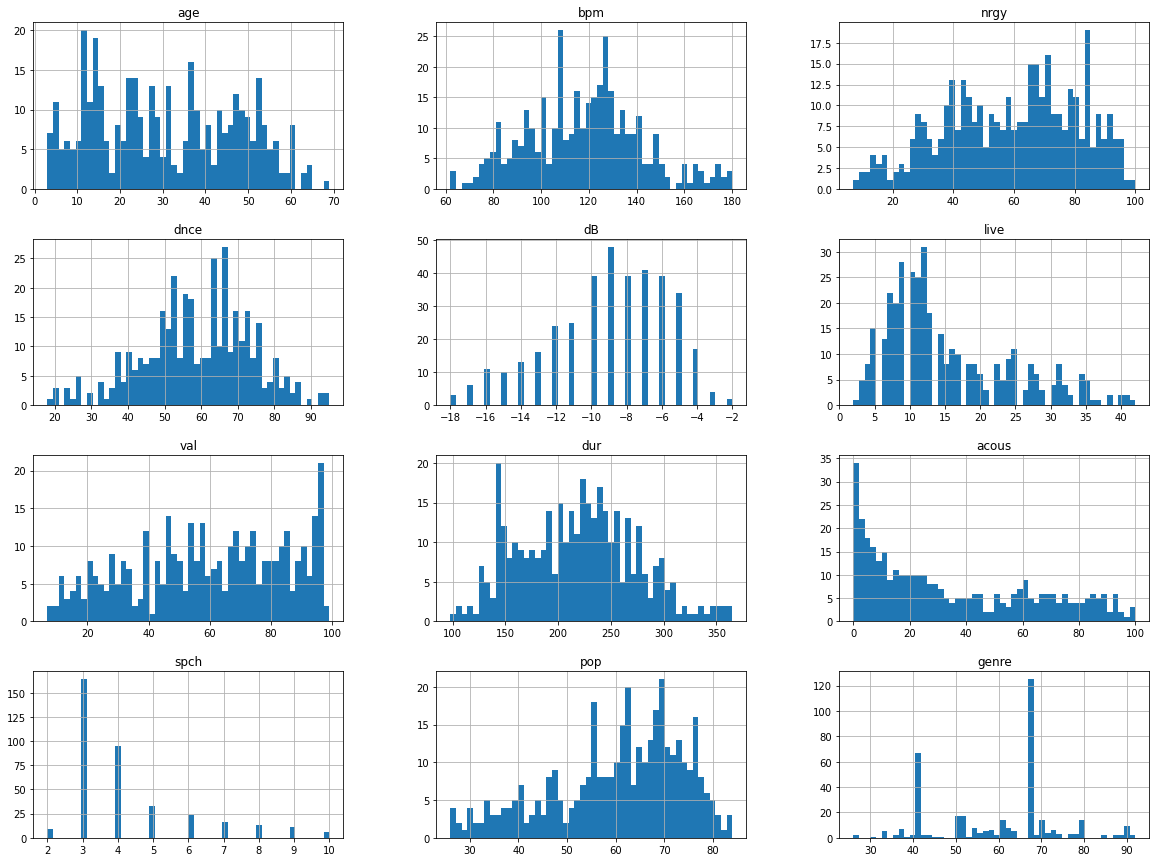

In [25]:
train_cleaned_df.hist(bins=50, figsize=(20,15))
plt.show()

<hr>
<p>speechness seemed skewed ,checking that out<p/>

In [26]:
train_cleaned_df['spch'].skew()

1.5278860634155143

<hr>
<p>removing skewiness<p/>

In [27]:
speechiness = np.log(train_cleaned_df["spch"])
print(speechiness.skew())

#not much difference so not skewing the feature

0.8516862978039079


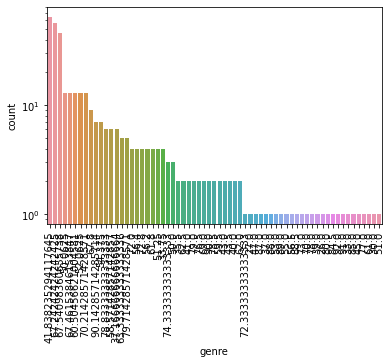

In [28]:
g = sns.countplot(
    x='genre',
    data = train_cleaned_df,
    order = train_cleaned_df["genre"].value_counts().index,
)
g.set_yscale('log')
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
plt.show()

<hr>
<p>
Checking Affect of features on target variable pop <br>
feature target interaction
<p/>

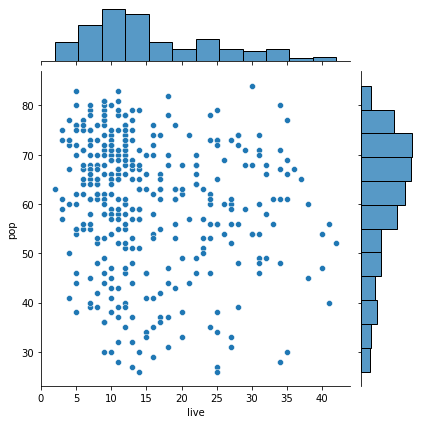

In [29]:
sns.jointplot(x='live', y= 'pop', data = train_cleaned_df)

<h>
<p> This visualisation above shows us a plot between popularity and live. <p/>
<br>

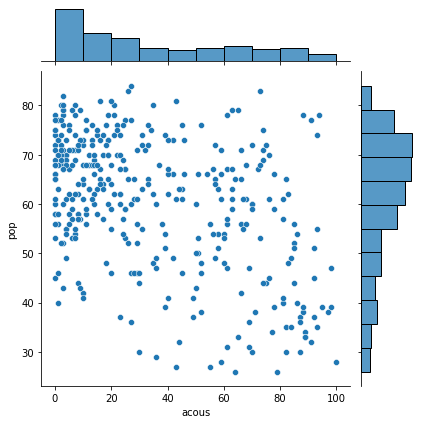

In [30]:
sns.jointplot(x='acous', y= 'pop', data = train_cleaned_df)

<h>
<p> From these previous steps that where performed a better idea was made on what affects the popularity score.
Now it is of interest to see what the correlation matrix willlook like once again between the independent variables against popularity with our cleaned up data, to see if their was any differences<p/>
<br>

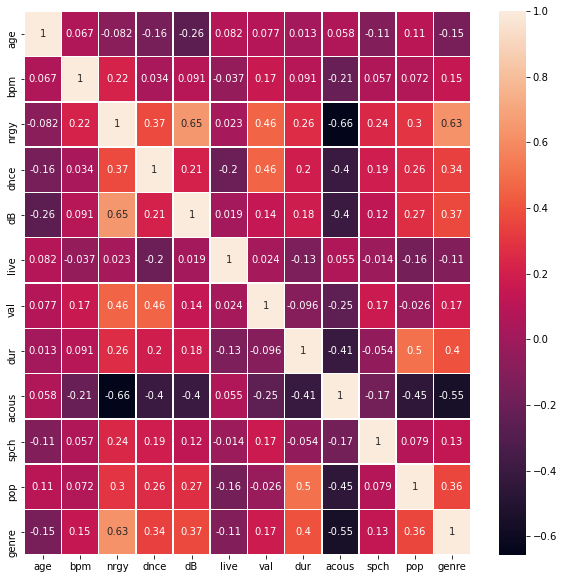

In [31]:
#so our assumptions are valid from the histogram we got
#get correlation of features
corrMatrix = train_cleaned_df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 

sns.heatmap(corrMatrix, annot=True,linewidths=.5, ax=ax)
plt.show()

In [32]:
corrMatrix["pop"].sort_values(ascending=False)

pop      1.000000
dur      0.502665
genre    0.364432
nrgy     0.295514
dB       0.269408
dnce     0.256201
age      0.105099
spch     0.079025
bpm      0.072078
val     -0.025514
live    -0.160387
acous   -0.450823
Name: pop, dtype: float64

<h>
<p> As previously seen there was not much correlation between 'age','val' and 'live' when comparing it to populartity. This remains the case along with there being a very low correlation between 'spch' and 'bpm' as well. With strongest of correlations coming from dur and a relatively strong negative correlation between acous when compared to the rest of the variables. These correlations will be kept in mind as the data preperation is finalised and the feature engineering process is started. <p/>
<br>

In [33]:
#Great! Now we have an better understanding of what we are dealing with and will help to create an insighful model

<h3>3. Feature Engineering</h3> <br/>

<h>
<p> When exploring the data not much was found when looking for any patterns, with respect to our target variable 'popularity', so it is of interest to try any transformations like taking the log, sqrt and squares of the variables. This is done to the full data set and is studied to see by doing each of these steps any sort of patterns apear.<p/>
<br>

In [34]:
#Creating copy of test dataset to do feature engineering same as the train dataeset which can be further used in kaggle prediction


In [35]:
display(test_df.info(),separator_line,test_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         114 non-null    int64 
 1   title      114 non-null    object
 2   artist     114 non-null    object
 3   top genre  113 non-null    object
 4   year       114 non-null    int64 
 5   bpm        114 non-null    int64 
 6   nrgy       114 non-null    int64 
 7   dnce       114 non-null    int64 
 8   dB         114 non-null    int64 
 9   live       114 non-null    int64 
 10  val        114 non-null    int64 
 11  dur        114 non-null    int64 
 12  acous      114 non-null    int64 
 13  spch       114 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 12.6+ KB


None

'====================================='

Id                                              title  \
0  454                                            Pump It   
1  455  Circle of Life - From "The Lion King"/Soundtra...   
2  456             We Are The Champions - Remastered 2011   
3  457                              Insomnia - Radio Edit   
4  458                                This Eve of Parting   

                artist         top genre  year  bpm  nrgy  dnce  dB  live  \
0  The Black Eyed Peas         dance pop  2005  154    93    65  -3    75   
1           Elton John         glam rock  1994  161    39    30 -15    11   
2                Queen         glam rock  1977   64    46    27  -7    12   
3            Faithless          big beat  2010  127    92    71  -9    37   
4        John Hartford  appalachian folk  2018  115    46    56 -12    21   

   val  dur  acous  spch  
0   74  213      1    18  
1   14  292     26     3  
2   18  179     38     3  
3   53  216      6     4  
4   34  153     18     3

In [36]:
#Encoding Test dataset
test_df=encoding(test_df)

In [37]:
#Change year to age for Test dataset
test_df=change_year_to_age(test_df)

<h>
<p> One of the main issues when trying to perform Regression models is it only takes numerical values. This is an issue as one of the variables top Genre is not numerical and it cannot be left out of this study as it is one of the variables that has the most impact on the popularity. By studying this column of top genre there was found to be 86 genres when looked at. So for each genre the mean of nrgy was found for each genre and this then replaced the genre with the numerical value, of mean of nrgy. 
The same steps will be performed when looking at the test set in order to get it the prediction to be able to submit the created csv file for kaggle prediction<p/>
<br>

<h>
<p> Merging the new genre values with the original dataset.<p/>
<br>

In [38]:
test_df.head()

Id                                              title  \
0  454                                            Pump It   
1  455  Circle of Life - From "The Lion King"/Soundtra...   
2  456             We Are The Champions - Remastered 2011   
3  457                              Insomnia - Radio Edit   
4  458                                This Eve of Parting   

                artist  age  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  \
0  The Black Eyed Peas   17  154    93    65  -3    75   74  213      1    18   
1           Elton John   28  161    39    30 -15    11   14  292     26     3   
2                Queen   45   64    46    27  -7    12   18  179     38     3   
3            Faithless   12  127    92    71  -9    37   53  216      6     4   
4        John Hartford    4  115    46    56 -12    21   34  153     18     3   

       genre  
0  68.571429  
1  59.428571  
2  59.428571  
3  92.000000  
4  46.000000

In [39]:
#dropping unnecessary feartures
test_cleaned_df = test_df.drop(columns=['Id','title','artist'])

<hr>
<h6>Dealing with Null values</h6>
<pr>While looking into test data we noticed that there are only 113 values in genre so it has one null value, maybe that's a stand alone genre
replacing Null value with nrgy value as kaggle required 114 rows to predict so cant drop the row
Also the training data has few null values in genre which we will drop <p/>

In [40]:
test_cleaned_df.isnull().any()

age      False
bpm      False
nrgy     False
dnce     False
dB       False
live     False
val      False
dur      False
acous    False
spch     False
genre     True
dtype: bool

In [41]:
#Replace null with 'nrgy' mean
test_cleaned_df=replace_null_with_mean(test_cleaned_df,True)


In [42]:
test_cleaned_df

age  bpm  nrgy  dnce  dB  live  val  dur  acous  spch      genre
0     17  154    93    65  -3    75   74  213      1    18  68.571429
1     28  161    39    30 -15    11   14  292     26     3  59.428571
2     45   64    46    27  -7    12   18  179     38     3  59.428571
3     12  127    92    71  -9    37   53  216      6     4  92.000000
4      4  115    46    56 -12    21   34  153     18     3  46.000000
..   ...  ...   ...   ...  ..   ...  ...  ...    ...   ...        ...
109   17  125    57    61  -8    38   76  209      3    47  69.250000
110   12  130    89    67  -6    10   80  215      4     3  86.000000
111   28   84    58    78  -7    14   76  253     43    27  69.250000
112   44  127    97    72  -5    12   73  287      6    14  87.666667
113   36  123    89    53  -4    29   80  249      8     3  89.000000

[114 rows x 11 columns]


<h>
<p> When dealing with the original dataset it was found that 15 rows have null values since this was a very small amount it was decided to remove these full columns from our dataset. 
</p>

<h>
<p> A copy is created of test data which has featuring same as training data but will keep Id column as it will be required by kaggle
</p>

In [43]:
train_cleaned_df.head()

age    bpm  nrgy  dnce    dB  live  val    dur  acous  spch   pop  \
0   26  107.0    31  45.0  -8.0  13.0   28  150.0     75   3.0  44.0   
1   11  114.0    44  53.0  -8.0  13.0   47  139.0     49   3.0  37.0   
2   43  105.0    36  63.0  -9.0  13.0   67  245.0     11   3.0  77.0   
3   42  170.0    28  47.0 -16.0  13.0   33  232.0     25   3.0  67.0   
4   49  121.0    47  56.0  -8.0  15.0   40  193.0     45   3.0  63.0   

       genre  
0  41.838235  
1  60.504566  
2  41.838235  
3  41.838235  
4  52.062500

In [44]:
#train_cleaned_df.drop(columns=['popularity'],inplace=True)

In [45]:
data_logVariables = train_cleaned_df.copy()
data_logVariables.head()

age    bpm  nrgy  dnce    dB  live  val    dur  acous  spch   pop  \
0   26  107.0    31  45.0  -8.0  13.0   28  150.0     75   3.0  44.0   
1   11  114.0    44  53.0  -8.0  13.0   47  139.0     49   3.0  37.0   
2   43  105.0    36  63.0  -9.0  13.0   67  245.0     11   3.0  77.0   
3   42  170.0    28  47.0 -16.0  13.0   33  232.0     25   3.0  67.0   
4   49  121.0    47  56.0  -8.0  15.0   40  193.0     45   3.0  63.0   

       genre  
0  41.838235  
1  60.504566  
2  41.838235  
3  41.838235  
4  52.062500

<h>
<p> A function has been created for transformations, either taking the log, squared and the sqrt transformations.<p/>
<br>

In [46]:
from enum import Enum
class transformation(Enum):
    log =1
    square=2
    squareRoot=3
           

def feature_transformation(dataset,transformation_method):
    for x in ['nrgy','acous','spch','genre','dur','dnce','bpm','live','val']:
        if transformation_method == transformation.log:
            dataset[x] =  np.log(dataset[x])
        elif transformation_method == transformation.square:
            dataset[x] =  dataset[x]**2         
        elif transformation_method == transformation.squareRoot:
            dataset[x] =  np.sqrt(dataset[x])
            
    return dataset
    


In [47]:
data_logVariables=feature_transformation(data_logVariables,transformation.log)

In [48]:
data_logVariables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 452
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     371 non-null    int64  
 1   bpm     371 non-null    float64
 2   nrgy    371 non-null    float64
 3   dnce    371 non-null    float64
 4   dB      371 non-null    float64
 5   live    371 non-null    float64
 6   val     371 non-null    float64
 7   dur     371 non-null    float64
 8   acous   371 non-null    float64
 9   spch    371 non-null    float64
 10  pop     371 non-null    float64
 11  genre   371 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 45.8 KB


In [49]:
data_logVariables.head()

age       bpm      nrgy      dnce    dB      live       val       dur  \
0   26  4.672829  3.433987  3.806662  -8.0  2.564949  3.332205  5.010635   
1   11  4.736198  3.784190  3.970292  -8.0  2.564949  3.850148  4.934474   
2   43  4.653960  3.583519  4.143135  -9.0  2.564949  4.204693  5.501258   
3   42  5.135798  3.332205  3.850148 -16.0  2.564949  3.496508  5.446737   
4   49  4.795791  3.850148  4.025352  -8.0  2.708050  3.688879  5.262690   

      acous      spch   pop     genre  
0  4.317488  1.098612  44.0  3.733811  
1  3.891820  1.098612  37.0  4.102719  
2  2.397895  1.098612  77.0  3.733811  
3  3.218876  1.098612  67.0  3.733811  
4  3.806662  1.098612  63.0  3.952445

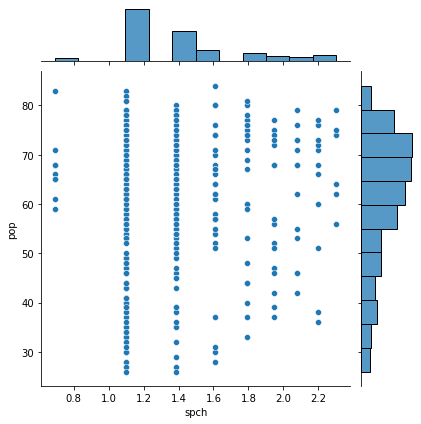

In [50]:
sns.jointplot(x='spch', y= 'pop', data = data_logVariables)

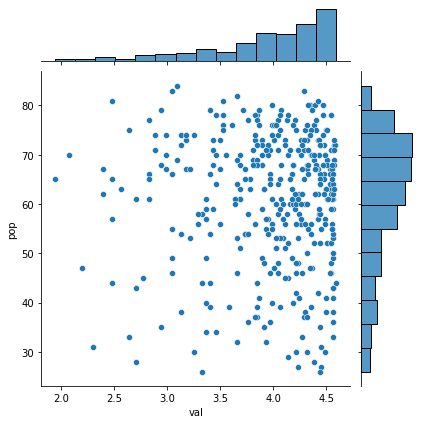

In [51]:
sns.jointplot(x='val', y= 'pop', data = data_logVariables)

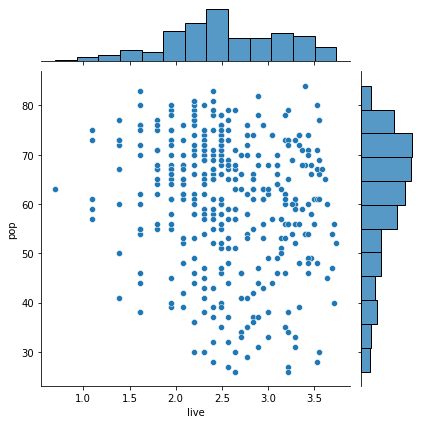

In [52]:
sns.jointplot(x='live', y= 'pop', data = data_logVariables)

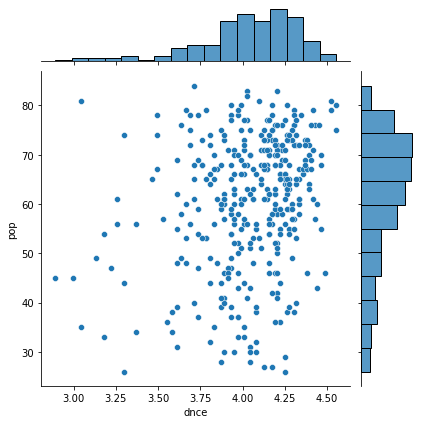

In [53]:
sns.jointplot(x='dnce', y= 'pop', data = data_logVariables)

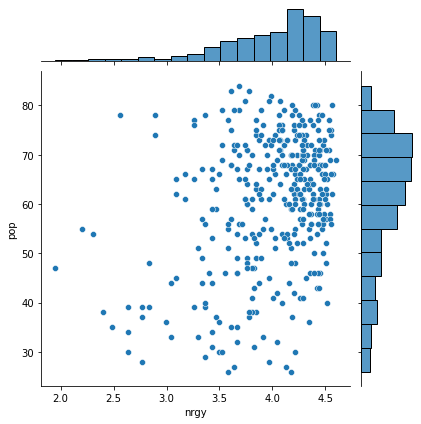

In [54]:
sns.jointplot(x='nrgy', y= 'pop', data = data_logVariables)

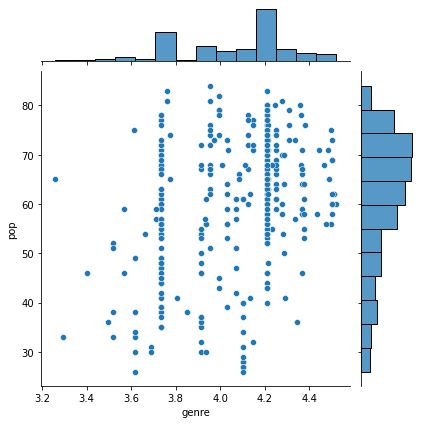

In [55]:
sns.jointplot(x='genre', y= 'pop', data = data_logVariables)

In [56]:
#Squaring all variables
data_sqVariables = train_cleaned_df.copy()
data_sqVariables.head()

age    bpm  nrgy  dnce    dB  live  val    dur  acous  spch   pop  \
0   26  107.0    31  45.0  -8.0  13.0   28  150.0     75   3.0  44.0   
1   11  114.0    44  53.0  -8.0  13.0   47  139.0     49   3.0  37.0   
2   43  105.0    36  63.0  -9.0  13.0   67  245.0     11   3.0  77.0   
3   42  170.0    28  47.0 -16.0  13.0   33  232.0     25   3.0  67.0   
4   49  121.0    47  56.0  -8.0  15.0   40  193.0     45   3.0  63.0   

       genre  
0  41.838235  
1  60.504566  
2  41.838235  
3  41.838235  
4  52.062500

In [57]:
data_sqVariables=feature_transformation(data_sqVariables,transformation.square)
data_sqVariables.head()

age      bpm  nrgy    dnce    dB   live   val      dur  acous  spch   pop  \
0   26  11449.0   961  2025.0  -8.0  169.0   784  22500.0   5625   9.0  44.0   
1   11  12996.0  1936  2809.0  -8.0  169.0  2209  19321.0   2401   9.0  37.0   
2   43  11025.0  1296  3969.0  -9.0  169.0  4489  60025.0    121   9.0  77.0   
3   42  28900.0   784  2209.0 -16.0  169.0  1089  53824.0    625   9.0  67.0   
4   49  14641.0  2209  3136.0  -8.0  225.0  1600  37249.0   2025   9.0  63.0   

         genre  
0  1750.437933  
1  3660.802532  
2  1750.437933  
3  1750.437933  
4  2710.503906

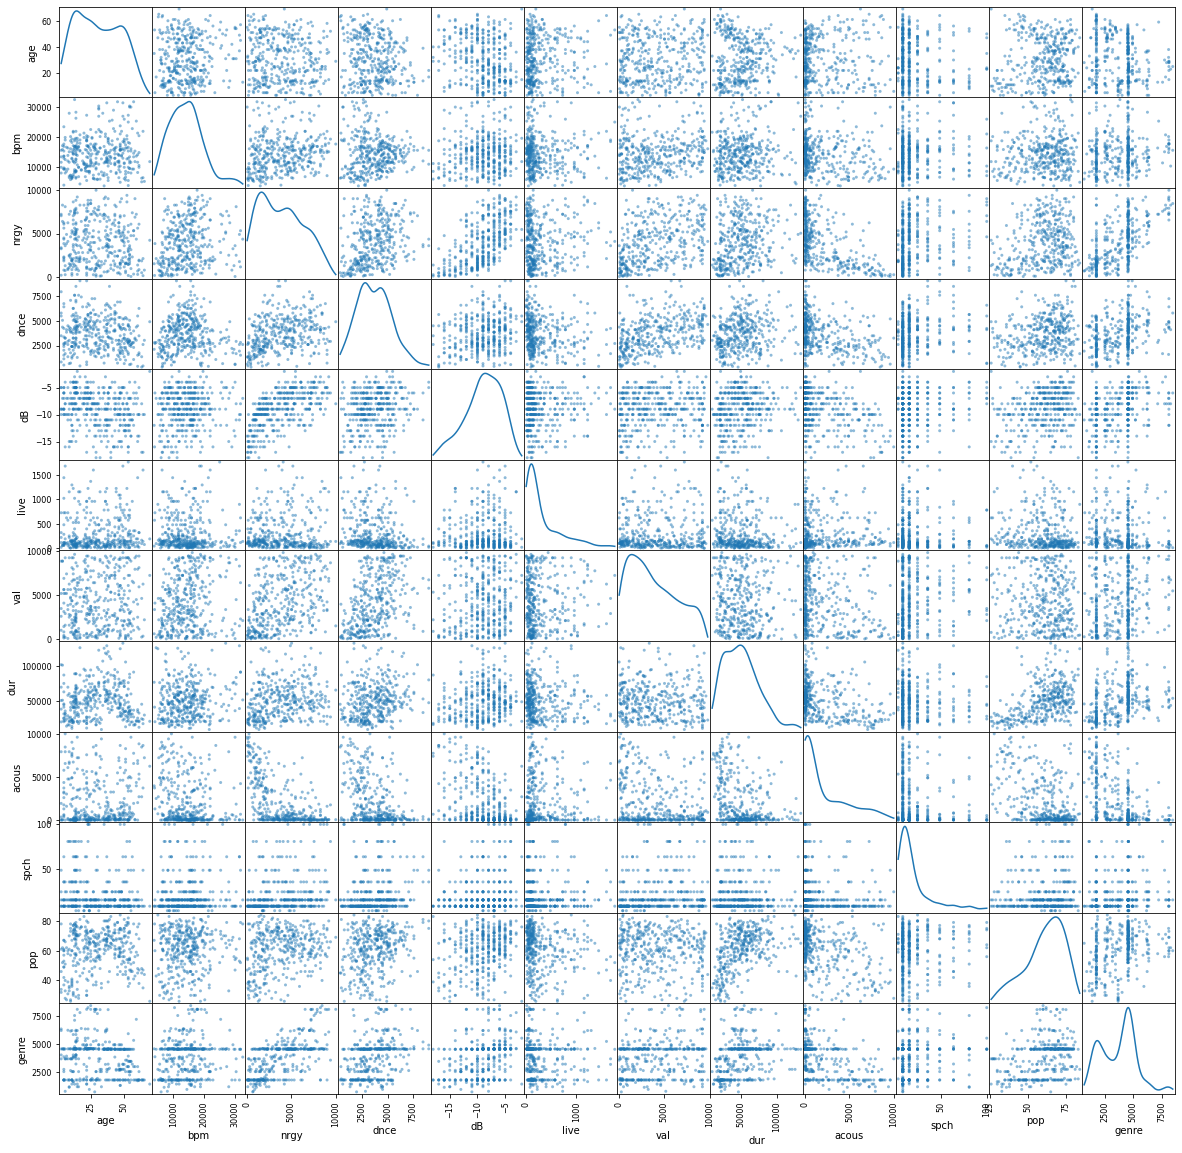

In [58]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_sqVariables, alpha=0.5, figsize=(20, 20), diagonal="kde");

In [59]:
#squareroot
data_sqRootVariables = train_cleaned_df.copy()
data_sqRootVariables.head()

age    bpm  nrgy  dnce    dB  live  val    dur  acous  spch   pop  \
0   26  107.0    31  45.0  -8.0  13.0   28  150.0     75   3.0  44.0   
1   11  114.0    44  53.0  -8.0  13.0   47  139.0     49   3.0  37.0   
2   43  105.0    36  63.0  -9.0  13.0   67  245.0     11   3.0  77.0   
3   42  170.0    28  47.0 -16.0  13.0   33  232.0     25   3.0  67.0   
4   49  121.0    47  56.0  -8.0  15.0   40  193.0     45   3.0  63.0   

       genre  
0  41.838235  
1  60.504566  
2  41.838235  
3  41.838235  
4  52.062500

In [60]:
data_sqRootVariables=feature_transformation(data_sqRootVariables,transformation.squareRoot)
data_sqRootVariables.head()

age        bpm      nrgy      dnce    dB      live       val        dur  \
0   26  10.344080  5.567764  6.708204  -8.0  3.605551  5.291503  12.247449   
1   11  10.677078  6.633250  7.280110  -8.0  3.605551  6.855655  11.789826   
2   43  10.246951  6.000000  7.937254  -9.0  3.605551  8.185353  15.652476   
3   42  13.038405  5.291503  6.855655 -16.0  3.605551  5.744563  15.231546   
4   49  11.000000  6.855655  7.483315  -8.0  3.872983  6.324555  13.892444   

      acous      spch   pop     genre  
0  8.660254  1.732051  44.0  6.468248  
1  7.000000  1.732051  37.0  7.778468  
2  3.316625  1.732051  77.0  6.468248  
3  5.000000  1.732051  67.0  6.468248  
4  6.708204  1.732051  63.0  7.215435

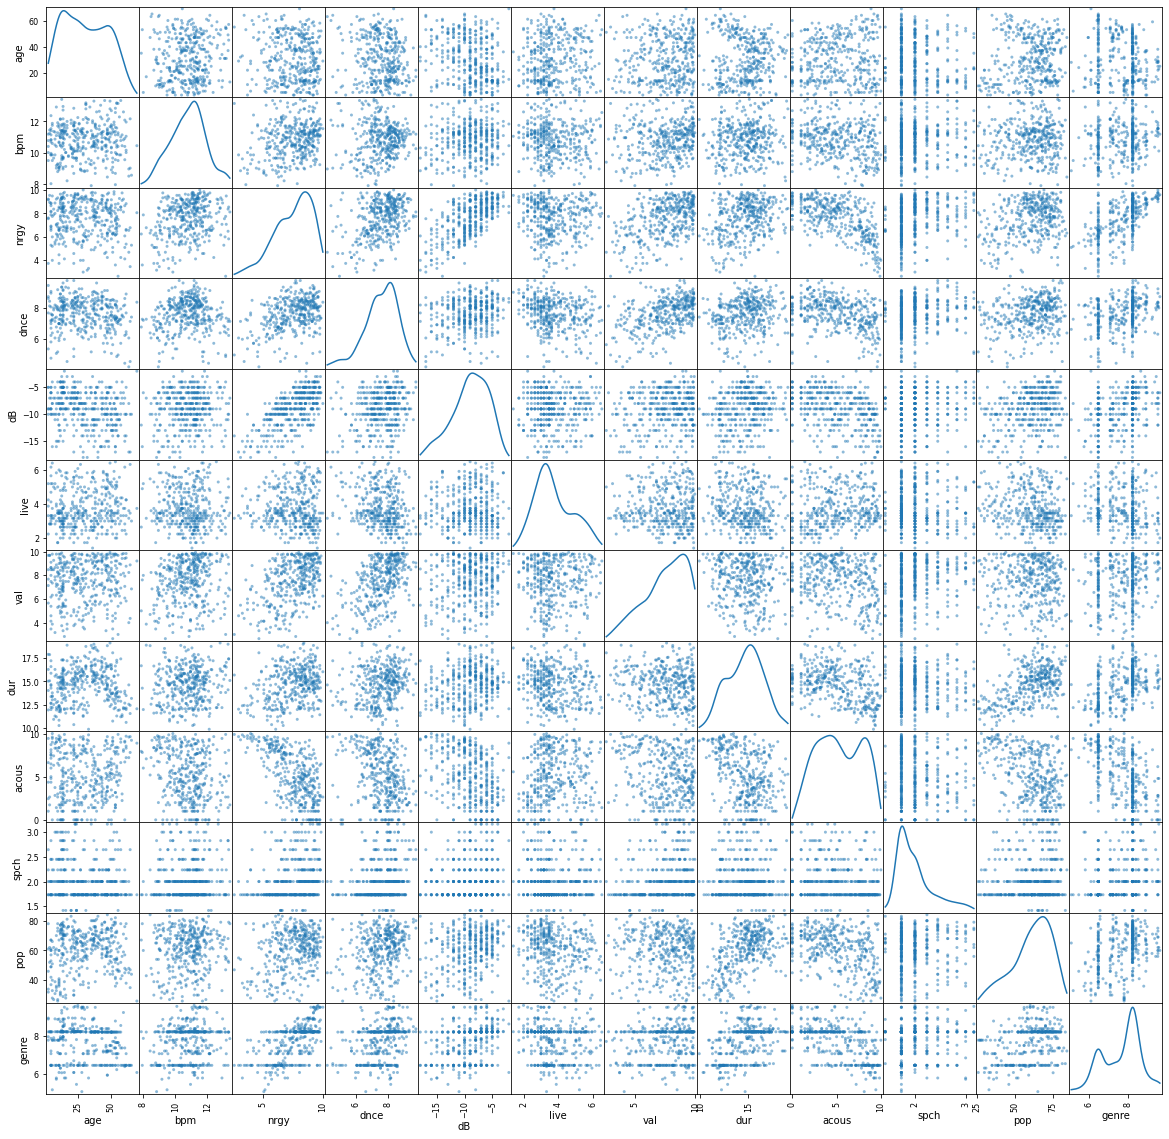

In [61]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_sqRootVariables, alpha=0.5, figsize=(20, 20), diagonal="kde");

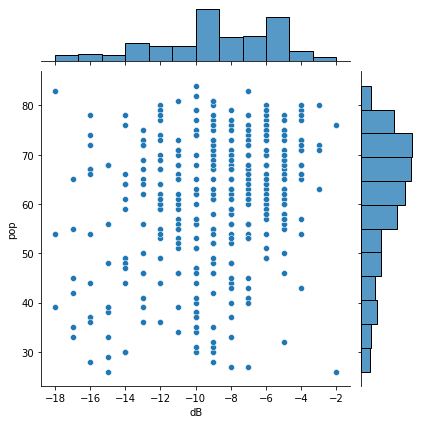

In [62]:
sns.jointplot(x='dB', y= 'pop', data = data_logVariables)

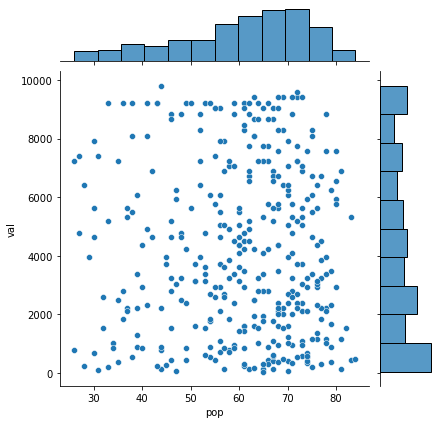

In [63]:
sns.jointplot(x='pop', y= 'val', data = data_sqVariables)

In [64]:
data_sqRootVariables.head()

age        bpm      nrgy      dnce    dB      live       val        dur  \
0   26  10.344080  5.567764  6.708204  -8.0  3.605551  5.291503  12.247449   
1   11  10.677078  6.633250  7.280110  -8.0  3.605551  6.855655  11.789826   
2   43  10.246951  6.000000  7.937254  -9.0  3.605551  8.185353  15.652476   
3   42  13.038405  5.291503  6.855655 -16.0  3.605551  5.744563  15.231546   
4   49  11.000000  6.855655  7.483315  -8.0  3.872983  6.324555  13.892444   

      acous      spch   pop     genre  
0  8.660254  1.732051  44.0  6.468248  
1  7.000000  1.732051  37.0  7.778468  
2  3.316625  1.732051  77.0  6.468248  
3  5.000000  1.732051  67.0  6.468248  
4  6.708204  1.732051  63.0  7.215435

<h>
<p> Remove unnecesseary features, which may create niose <p/>
<br>

In [65]:

def remove_features(dataset,features):
    dataset.drop(columns=features,inplace=True)    
    return dataset



In [66]:
train_cleaned_df

age    bpm  nrgy  dnce    dB  live  val    dur  acous  spch   pop  \
0     26  107.0    31  45.0  -8.0  13.0   28  150.0     75   3.0  44.0   
1     11  114.0    44  53.0  -8.0  13.0   47  139.0     49   3.0  37.0   
2     43  105.0    36  63.0  -9.0  13.0   67  245.0     11   3.0  77.0   
3     42  170.0    28  47.0 -16.0  13.0   33  232.0     25   3.0  67.0   
4     49  121.0    47  56.0  -8.0  15.0   40  193.0     45   3.0  63.0   
..   ...    ...   ...   ...   ...   ...  ...    ...    ...   ...   ...   
447    5  130.0    66  51.0 -10.0  11.0   75  161.0     23   6.0  37.0   
448   63   80.0    22  18.0 -17.0  10.0   16  214.0     92   4.0  45.0   
449   12  148.0    81  53.0 -13.0  23.0   96  147.0     50   3.0  50.0   
451   22  165.0    87  64.0  -5.0   6.0   88  191.0      5   8.0  62.0   
452   20  105.0    73  68.0  -8.0  14.0   94  281.0     11   2.0  59.0   

         genre  
0    41.838235  
1    60.504566  
2    41.838235  
3    41.838235  
4    52.062500  
..         ...  
447  50.062500  
448  41.838235  
449  50.062500  
451  67.800000  
452  67.242424  

[371 rows x 12 columns]

In [67]:
train_to_be_processed_df= train_cleaned_df.copy()
to_be_removed_features=['acous','age','val','live'] #removing weak corelatted  feature variable with Target variable ''
train_finalized_df = remove_features(train_to_be_processed_df,to_be_removed_features)


<h3>4. MODEL BUILDING BEGIN<h3> 

<h>
<p> train_finalized_df is copy of original dataset without null values and genre as numerical
data_sqRootVariables is copy of dataset with feature variables as squareroot
data_logVariables is copy of dataset with feature variables as log
data_sqVariables is copy of dataset with feature variables as square  <p/>


In [68]:
train_finalized_df.isnull().any()

bpm      False
nrgy     False
dnce     False
dB       False
dur      False
spch     False
pop      False
genre    False
dtype: bool

In [69]:
train_finalized_df.max()

bpm      180.0
nrgy     100.0
dnce      95.0
dB        -2.0
dur      365.0
spch      10.0
pop       84.0
genre     92.0
dtype: float64

In [70]:
train_finalized_df

bpm  nrgy  dnce    dB    dur  spch   pop      genre
0    107.0    31  45.0  -8.0  150.0   3.0  44.0  41.838235
1    114.0    44  53.0  -8.0  139.0   3.0  37.0  60.504566
2    105.0    36  63.0  -9.0  245.0   3.0  77.0  41.838235
3    170.0    28  47.0 -16.0  232.0   3.0  67.0  41.838235
4    121.0    47  56.0  -8.0  193.0   3.0  63.0  52.062500
..     ...   ...   ...   ...    ...   ...   ...        ...
447  130.0    66  51.0 -10.0  161.0   6.0  37.0  50.062500
448   80.0    22  18.0 -17.0  214.0   4.0  45.0  41.838235
449  148.0    81  53.0 -13.0  147.0   3.0  50.0  50.062500
451  165.0    87  64.0  -5.0  191.0   8.0  62.0  67.800000
452  105.0    73  68.0  -8.0  281.0   2.0  59.0  67.242424

[371 rows x 8 columns]

<hr>
<p>separating train and test<p/>

In [71]:
from sklearn.model_selection import train_test_split

features = train_finalized_df.drop(["pop"], axis = 1)
target = train_finalized_df["pop"]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3)



In [72]:
features.head()

bpm  nrgy  dnce    dB    dur  spch      genre
0  107.0    31  45.0  -8.0  150.0   3.0  41.838235
1  114.0    44  53.0  -8.0  139.0   3.0  60.504566
2  105.0    36  63.0  -9.0  245.0   3.0  41.838235
3  170.0    28  47.0 -16.0  232.0   3.0  41.838235
4  121.0    47  56.0  -8.0  193.0   3.0  52.062500

<hr>
<p>Checking the infinity values in the features dataset<p/>

In [73]:
features.max()


bpm      180.0
nrgy     100.0
dnce      95.0
dB        -2.0
dur      365.0
spch      10.0
genre     92.0
dtype: float64

In [74]:
##using train and test excels for kaggle prediction scores
#x_train = train_cleaned_df.drop(["pop"], axis = 1)
#x_test = test_df
#y_train= train_cleaned_df["pop"]

<hr>
<p>All models that will be built in the Regression part of this assignment will built by using the filtered independent variables, bpm, nrgy,dnce,db,dur,spch and Genre.<p/>

In [75]:
#importing to build models
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import pandas as pd
from sklearn.svm import LinearSVR

<h3>Model A: Linear Regression<h3> 

<hr>
<p>First model that has been built was Linear Regression. The results of the performance can also be seen below. In this process we are using sklearn pipeline for scaling to perform the Linear regression.<p/>

In [76]:
#Linear Regresion for data_copy
#scaling the data for model building # Linear regresssion model
pipeline1 = Pipeline([
    ("Scaling", MinMaxScaler()),
    ("Linear Regression", LinearRegression())
])
pipeline1.fit(x_train, y_train)

predicted = pipeline1.predict(x_test)
print(pipeline1.score(x_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:',mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, predicted))) 

0.16186448154195643
Mean Absolute Error: 10.521448574236748
Mean Squared Error: 160.2992308666845
Root Mean Squared Error: 12.6609332541754


<hr>
<p>Below what can be seen is when comparing the actual and predicted results a linear pattern can sort of be seen.<p/>

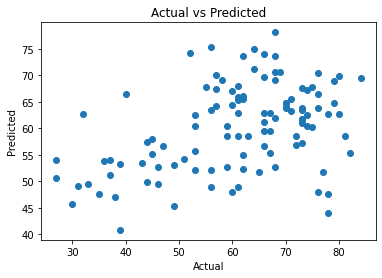

In [77]:
plt.scatter(y_test,predicted)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

<hr>
<p>Below in an ideal world this would be bellshaped but it can still be seen that this is pretty evenly distributed.<p/>

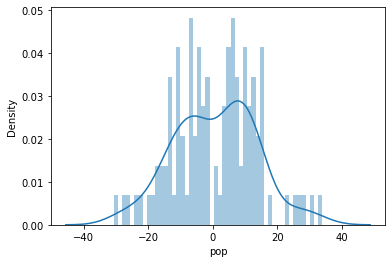

In [78]:
sns.distplot((y_test-predicted),bins=50); 

<h3>Model B: Decision Tree Regression<h3> 

<hr>
<p>The next regression model that was built was a decision tree regression this was done with the sklearn pipeline that was used to scale for the decision tree. The results of how well the model performed can also be seen below.<p/>

In [79]:
#Decision Tree   
#Using MinMax Scaler
pipeline1 = Pipeline([
    ("Scaling", MinMaxScaler()),
    ("Decision Tree Regression", DecisionTreeRegressor(max_depth = 3))
])
pipeline1.fit(x_train, y_train)

predicted = pipeline1.predict(x_test)
train_predicted = pipeline1.predict(x_train)

score_tree = pipeline1.score(x_train, y_train)
print("R-Squared:", score_tree)

mse_tree = mean_squared_error(y_train, train_predicted)
print("MSE: ", mse_tree)
print("RMSE: ", np.sqrt(mse_tree))

R-Squared: 0.4781673247920212
MSE:  93.06589882639581
RMSE:  9.64706685093432


<hr>
<p>In this step the linear regression is used once again to get an improved model but this time with the scaling of polynomial features to make the linear regression model <p/>

In [80]:
#Checking with Polynomial Features
#For data_copy
transformer = PolynomialFeatures(degree=2, include_bias=False)

x_train_scaled = scale(x_train)
y_train_scaled = scale(y_train)
x_test_scaled = scale(x_test)

x_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_train_scaled)
x_test_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_test_scaled)

predict = LinearRegression().fit(x_train_poly, y_train_scaled)

r_sq_poly = predict.score(x_train_poly, y_train_scaled)
print('coefficient of determination:', r_sq_poly)

print('intercept:', predict.intercept_)

print('coefficients:', predict.coef_)


y_pred_poly = predict.predict(x_test_poly)
y_pred_poly_train = predict.predict(x_train_poly)

mse = mean_squared_error(y_train_scaled, y_pred_poly_train)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

coefficient of determination: 0.5558623052901802
intercept: 0.25908891548338814
coefficients: [ 0.0323703  -0.0163192   0.15378319  0.23634615  0.40471154  0.06521089
 -0.09429657  0.02137498 -0.09018959  0.00903434  0.10432286  0.05416957
 -0.04910654 -0.00228231  0.0603794  -0.15240076 -0.18181849 -0.15742253
 -0.01117955  0.33369457 -0.0601178  -0.0201244  -0.06651962 -0.02643896
  0.16480727  0.08834429 -0.08922905  0.25001528  0.06891671 -0.10201544
 -0.08511604 -0.12671004 -0.05421541 -0.01747716 -0.22013627]
MSE:  0.4441376947098198
RMSE:  0.6664365646554965


<hr>
<p>Here the decision tree regrission using the sklearn scale. Using sklearn scale is not recommended because of risk of data leak. <p/>

In [81]:
#Decision Tree For data_copy  

tree_reg = DecisionTreeRegressor(max_depth = 3)

x_train_scaled = scale(x_train)
y_train_scaled = scale(y_train)
x_test_scaled = scale(x_test)
tree_reg.fit(x_train_scaled, y_train_scaled)

tree_predict = tree_reg.predict(x_test_scaled)
tree_train_predict = tree_reg.predict(x_train_scaled)

score_tree = tree_reg.score(x_train_scaled, y_train_scaled)
print("R-Squared:", score_tree)

mse_tree = mean_squared_error(y_train_scaled, tree_train_predict)
print("MSE: ", mse_tree)
print("RMSE: ", np.sqrt(mse_tree))

R-Squared: 0.4781673247920212
MSE:  0.5218326752079788
RMSE:  0.7223798690495042


<h3>Model C: Support Vector Machine Regression<h3> 

<hr>
<p>This is the final model using Suppuort Vector Machine regression.<p/>

In [82]:
#SVR for data_copy  
rng = np.random.RandomState(0)
x_train_scaled = scale(x_train)
y_train_scaled = scale(y_train)
x_test_scaled = scale(x_test)

SVR_lin =  SVR(C=1.0, epsilon=0.2)
SVR_lin.fit(x_train_scaled, y_train_scaled)

predict = SVR_lin.predict(x_test_scaled)
predict_SVR = SVR_lin.predict(x_train_scaled)
    
score_SVR = SVR_lin.score(x_train_scaled, y_train_scaled)
print("R-Squared:", score_SVR)

mse_SVR = mean_squared_error(y_train_scaled, predict_SVR)
print("MSE: ", mse_SVR)
print("RMSE: ", np.sqrt(mse_SVR))


R-Squared: 0.6075431547850818
MSE:  0.39245684521491814
RMSE:  0.6264637620923641


In [83]:
test_cleaned_df

age  bpm  nrgy  dnce  dB  live  val  dur  acous  spch      genre
0     17  154    93    65  -3    75   74  213      1    18  68.571429
1     28  161    39    30 -15    11   14  292     26     3  59.428571
2     45   64    46    27  -7    12   18  179     38     3  59.428571
3     12  127    92    71  -9    37   53  216      6     4  92.000000
4      4  115    46    56 -12    21   34  153     18     3  46.000000
..   ...  ...   ...   ...  ..   ...  ...  ...    ...   ...        ...
109   17  125    57    61  -8    38   76  209      3    47  69.250000
110   12  130    89    67  -6    10   80  215      4     3  86.000000
111   28   84    58    78  -7    14   76  253     43    27  69.250000
112   44  127    97    72  -5    12   73  287      6    14  87.666667
113   36  123    89    53  -4    29   80  249      8     3  89.000000

[114 rows x 11 columns]

In [84]:
## to check data in Kaggle
data_kaggle_test=test_df
#data_kaggle_test
#to_be_removed_features=['acous','age','val','live'] #removing weak corelatted  feature variable with Target variable ''
test_finalized_df = remove_features(test_cleaned_df,to_be_removed_features)
df_output_test = pd.DataFrame([])

In [85]:
#to upload in Kaggle using SVR
#score 9
rng = np.random.RandomState(0)

SVR = LinearSVR(epsilon=1.5)
SVR.fit(x_train, y_train)

predict = SVR.predict(test_finalized_df)
predicted = pipeline1.predict(test_cleaned_df)
df_output_test.iloc[0:0]
df_output_test = pd.DataFrame({'Id':data_kaggle_test.Id, 'pop':predict})
print(df_output_test)
df_output_test.to_csv('LinearSVR_result.csv', index = False)

      Id         pop
0    454   88.068343
1    455   76.887456
2    456   50.086101
3    457   76.174809
4    458   53.945418
..   ...         ...
109  563  106.429330
110  564   74.277383
111  565   92.570928
112  566   95.325716
113  567   77.072358

[114 rows x 2 columns]


In [86]:
#to upload in Kaggle using Linear Regression
#score 8

pipeline1 = Pipeline([
    ("Scaling", StandardScaler()),
    ("Linear Regression", LinearRegression())
])
pipeline1.fit(x_train, y_train)

predicted = pipeline1.predict(test_finalized_df)
predicted = pipeline1.predict(test_cleaned_df)
df_output_test.iloc[0:0]
df_output_test = pd.DataFrame({'Id':data_kaggle_test.Id, 'pop':predicted})
print(df_output_test)
df_output_test.to_csv('LinearRegression_with_StandardScaler_result.csv', index = False)

      Id        pop
0    454  74.756487
1    455  62.282119
2    456  52.212722
3    457  63.945204
4    458  48.965620
..   ...        ...
109  563  83.526812
110  564  64.987316
111  565  77.410503
112  566  79.330929
113  567  69.004689

[114 rows x 2 columns]


In [87]:
#Decision Tree for Kaggle with Min Max scaler
#score 9
pipeline1 = Pipeline([
    ("Scaling", MinMaxScaler()),
    ("Decision Tree Regression", DecisionTreeRegressor(max_depth = 3))
])
pipeline1.fit(x_train, y_train)

predicted = pipeline1.predict(test_cleaned_df)
df_output_test.iloc[0:0]
df_output_test = pd.DataFrame({'Id':data_kaggle_test.Id, 'pop':predicted})
print(df_output_test)
df_output_test.to_csv('DecisionTreeRegression_result.csv', index = False)

      Id        pop
0    454  70.869565
1    455  65.860465
2    456  49.571429
3    457  65.860465
4    458  49.571429
..   ...        ...
109  563  70.869565
110  564  65.860465
111  565  70.869565
112  566  70.869565
113  567  65.860465

[114 rows x 2 columns]


<hr>
<h3>Conclusion</h3>
<p>
The best model is the Linear Regression Model, it can be seen that we have better results (RMSE) with Polynomial features, decision tree and SVR although it is not a best model as we are scaling with sklearn.scale which leads to data leakage and it is not recommended and the results cannot be relied on. So we go with Linear Regression model as our final choice. 
</p>